# Music Genre Classification from Audio Files
### 17K41A0462, 17K41A0485, 17K41A0579
 - Feature Extraction of Audio Files
 - Implementation of ANN

### A. To analyse & extract features from audio files 

In [2]:
import librosa
audio_path = 'C:\\Users\\dell\\Desktop\\AAI\\Batch_9\\classical\\classical.00000.wav'
x , sr = librosa.load(audio_path)
#x represents represents the recorded samples of amplitudes in audio
#sr represents the sample rate

### Waveform

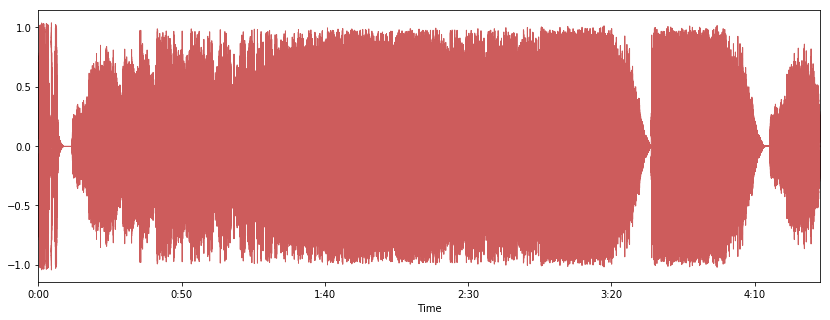

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr,color='indianred')

### Spectrogram

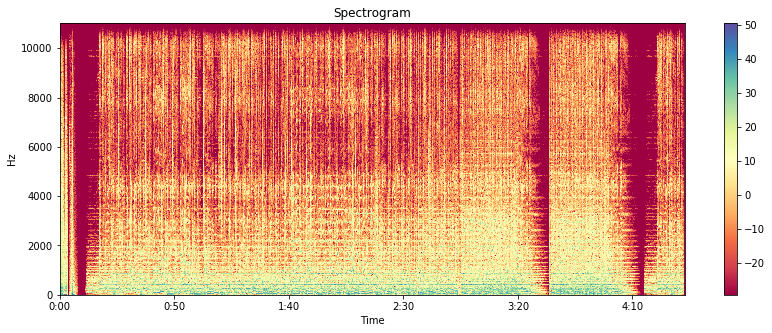

In [4]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz',cmap='Spectral')
plt.title('Spectrogram')
plt.colorbar(cmap='Spectral')

### Zero Crossing Rate

Text(0.5,1,'Zero Crossing Rate')

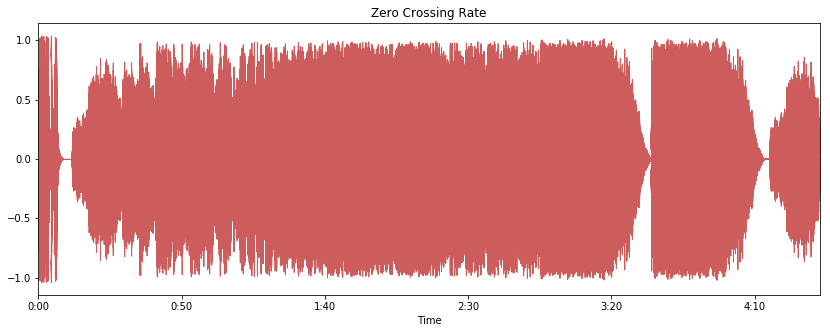

In [5]:
# Load the signal
x, sr = librosa.load(audio_path)
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr,color='indianred')
plt.title('Zero Crossing Rate')

In [6]:
zero_crossings = librosa.zero_crossings(x[1:149], pad=False)
print(sum(zero_crossings))

10


### Spectral Centroid

In [7]:
import sklearn

Text(0.5,1,'Spectral Centroid')

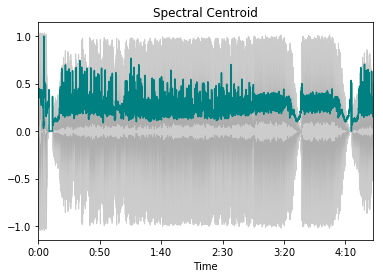

In [8]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4,color='grey')
plt.plot(t, normalize(spectral_centroids), color='teal')
plt.title('Spectral Centroid')

### Spectral Rolloff

Text(0.5,1,'Spectral Rolloff')

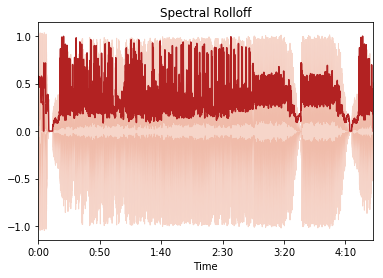

In [9]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4,color='darksalmon')
plt.plot(t, normalize(spectral_rolloff), color='firebrick')
plt.title('Spectral Rolloff')

### Mel-Frequency Cepstral Coefficients -MFCC

Text(0.5,1,'MFCC')

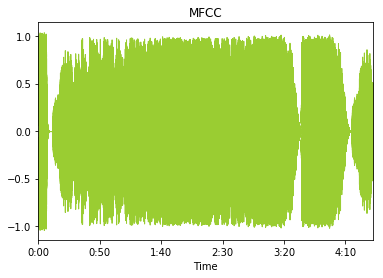

In [10]:
x, fs = librosa.load(audio_path)
librosa.display.waveplot(x, sr=sr,color='yellowgreen')
plt.title('MFCC')

In [11]:
mfccs = librosa.feature.mfcc(x, sr=fs)
print(mfccs.shape)

(20, 11746)


### Chroma Frequencies

Text(0.5,1,'Chroma Frequencies')

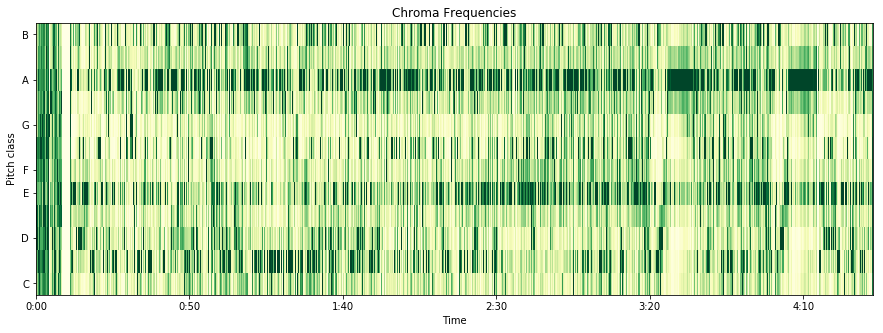

In [12]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='YlGn')
plt.title('Chroma Frequencies')

### B. To implement artificial neural network to classify the genres

### Importing the required libraries

In [13]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow
import keras
import warnings
warnings.filterwarnings('ignore')

### Extracting the Spectrogram for every Audio

In [14]:

cmap = plt.get_cmap('inferno')

plt.figure(figsize=(10,10))
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    pathlib.Path(f'img_data/{g}').mkdir(parents=True, exist_ok=True)     
    for filename in os.listdir(f'C:\\Users\\dell\\Desktop\\AAI\\genres\\{g}'):
        songname = f'C:\\Users\\dell\\Desktop\\AAI\\genres\\{g}\\{filename}'
        y, sr = librosa.load(songname, mono=True, duration=5)
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('off');
        plt.savefig(f'img_data/{g}/{filename[:-3].replace(".", "")}.png')
        plt.clf()

<Figure size 720x720 with 0 Axes>

### Extracting Features from Spectrogram

In [15]:
header = 'filename chroma_stft spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

### Writing data to csv file

In [16]:
file = open('Extracted_Data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    for filename in os.listdir(f'C:\\Users\\dell\\Desktop\\AAI\\genres\\{g}'):
        songname = f'C:\\Users\\dell\\Desktop\\AAI\\genres\\{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('Extracted_Data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

### Analysing the Data in Pandas

In [17]:
data= pd.read_csv('Extracted_Data.csv')
data.head()

,filename,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.au,0.349943,1784.420446,2002.650192,3806.485316,0.083066,-113.596748,121.557297,-19.158825,42.351032,...,8.810669,-3.667369,5.751691,-5.162763,0.750948,-1.691938,-0.409953,-2.300209,1.219929,blues
1,blues.00001.au,0.340983,1529.835316,2038.617579,3548.820207,0.056044,-207.556793,124.006721,8.930560,35.874687,...,5.376802,-2.239120,4.216963,-6.012273,0.936110,-0.716537,0.293876,-0.287431,0.531574,blues
2,blues.00002.au,0.363603,1552.481958,1747.165985,3040.514948,0.076301,-90.754387,140.459915,-29.109964,31.689013,...,5.789265,-8.905224,-1.083720,-9.218359,2.455806,-7.726901,-1.815723,-3.433434,-2.226821,blues
3,blues.00003.au,0.404779,1070.119953,1596.333948,2185.028454,0.033309,-199.431152,150.099213,5.647593,26.871927,...,6.087676,-2.476421,-1.073891,-2.874778,0.780977,-3.316932,0.637981,-0.619690,-3.408233,blues
4,blues.00004.au,0.308590,1835.494603,1748.362448,3580.945013,0.101500,-160.266037,126.198807,-35.605450,22.153301,...,-2.806384,-6.934123,-7.558618,-9.173553,-4.512165,-5.453538,-0.924161,-4.409333,-11.703780,blues


In [18]:
data.shape

(1000, 27)

In [19]:
data.drop(['filename'],axis=1,inplace=True)

### Encoding the Labels

In [20]:
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)

### Scaling the Feature columns

In [21]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

### Dividing data into Training and Testing set

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))

model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))

In [24]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
history = model.fit(X_train,
                    y_train,
                    epochs=30,
                    batch_size=128)

Epoch 1/30
7/7 [==============================] - 32s 71ms/step - loss: 2.2431 - accuracy: 0.1608
Epoch 2/30
7/7 [==============================] - 0s 3ms/step - loss: 1.9271 - accuracy: 0.3600
Epoch 3/30
7/7 [==============================] - 0s 3ms/step - loss: 1.7136 - accuracy: 0.3819
Epoch 4/30
7/7 [==============================] - 0s 3ms/step - loss: 1.5079 - accuracy: 0.4589
Epoch 5/30
7/7 [==============================] - 0s 4ms/step - loss: 1.3341 - accuracy: 0.5701
Epoch 6/30
7/7 [==============================] - 0s 3ms/step - loss: 1.2459 - accuracy: 0.6110
Epoch 7/30
7/7 [==============================] - ETA: 0s - loss: 1.1202 - accuracy: 0.66 - 0s 4ms/step - loss: 1.1351 - accuracy: 0.6280
Epoch 8/30
7/7 [==============================] - 0s 2ms/step - loss: 1.0882 - accuracy: 0.6603
Epoch 9/30
7/7 [==============================] - 0s 2ms/step - loss: 0.9628 - accuracy: 0.7077
Epoch 10/30
7/7 [==============================] - 0s 2ms/step - loss: 0.9479 - accuracy: 0.

In [26]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print('test_acc: ',test_acc)

7/7 [==============================] - 0s 1ms/step - loss: 1.0020 - accuracy: 0.6600
test_acc:  0.6600000262260437
